In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install Keras-Preprocessing
%pip install tensorflow
%pip install keras
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import torch

In [3]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
filenames = os.listdir("C:/Users/VaishnaviKanagaraj/Desktop/images_train_test_val/training_v/")
categories = []
category_names = []
for filename in filenames:
    category = filename.split('_')[0]
    categories.append(category)
    if(category not in category_names): category_names.append(category)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(category_names)

['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


In [6]:
df.head()

filename      category
0  agricultural_000001.png  agricultural
1  agricultural_000003.png  agricultural
2  agricultural_000005.png  agricultural
3  agricultural_000006.png  agricultural
4  agricultural_000008.png  agricultural

In [7]:
df.tail()

filename     category
7345  tenniscourt_000492.png  tenniscourt
7346  tenniscourt_000493.png  tenniscourt
7347  tenniscourt_000496.png  tenniscourt
7348  tenniscourt_000497.png  tenniscourt
7349  tenniscourt_000498.png  tenniscourt

<Axes: xlabel='category'>

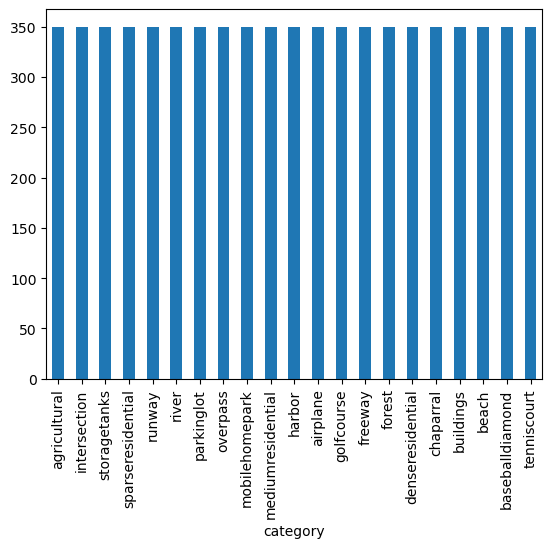

In [8]:
df['category'].value_counts().plot.bar()

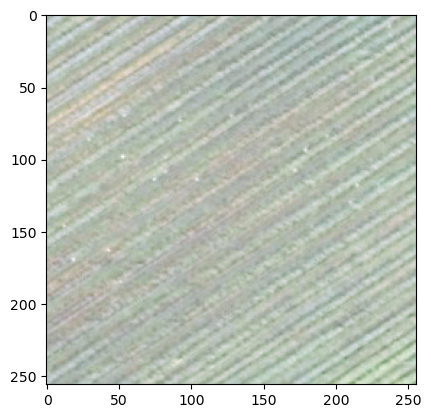

In [9]:
sample = random.choice(filenames)
image = load_img("C:/Users/VaishnaviKanagaraj/Desktop/images_train_test_val/training_v/"+sample)
plt.imshow(image)

In [109]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Assuming IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS are defined
# Example: IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 128, 128, 3

model = Sequential()

# First hidden layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second hidden layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third hidden layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer for multi-label classification
model.add(Dense(len(category_names), activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\VaishnaviKanagaraj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 21)             │        10,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,952,533 (49.41 MB)

 Trainable params: 12,951,061 (49.40 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [96]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [98]:
earlystop = EarlyStopping(patience=10)

In [99]:
# reduce learning rate when accuracy is not improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [100]:
callbacks = [earlystop, learning_rate_reduction]

In [101]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

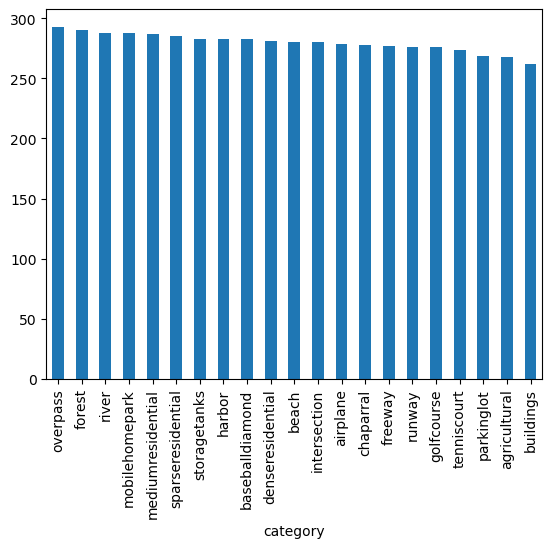

In [102]:
train_df['category'].value_counts().plot.bar()
# validate_df['category'].value_counts().plot.bar()

In [103]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

print(total_train)
print(total_validate)

5880
1470


In [104]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/VaishnaviKanagaraj/Desktop/images_train_test_val/training_v/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5880 validated image filenames belonging to 21 classes.


In [105]:
print(train_df['category'])
print(validate_df['category'].dtype)


0            storagetanks
1            agricultural
2                overpass
3       mediumresidential
4                airplane
              ...        
5875             overpass
5876             overpass
5877           parkinglot
5878      baseballdiamond
5879          tenniscourt
Name: category, Length: 5880, dtype: object
object


In [106]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/VaishnaviKanagaraj/Desktop/images_train_test_val/training_v/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1470 validated image filenames belonging to 21 classes.


Found 1 validated image filenames belonging to 1 classes.


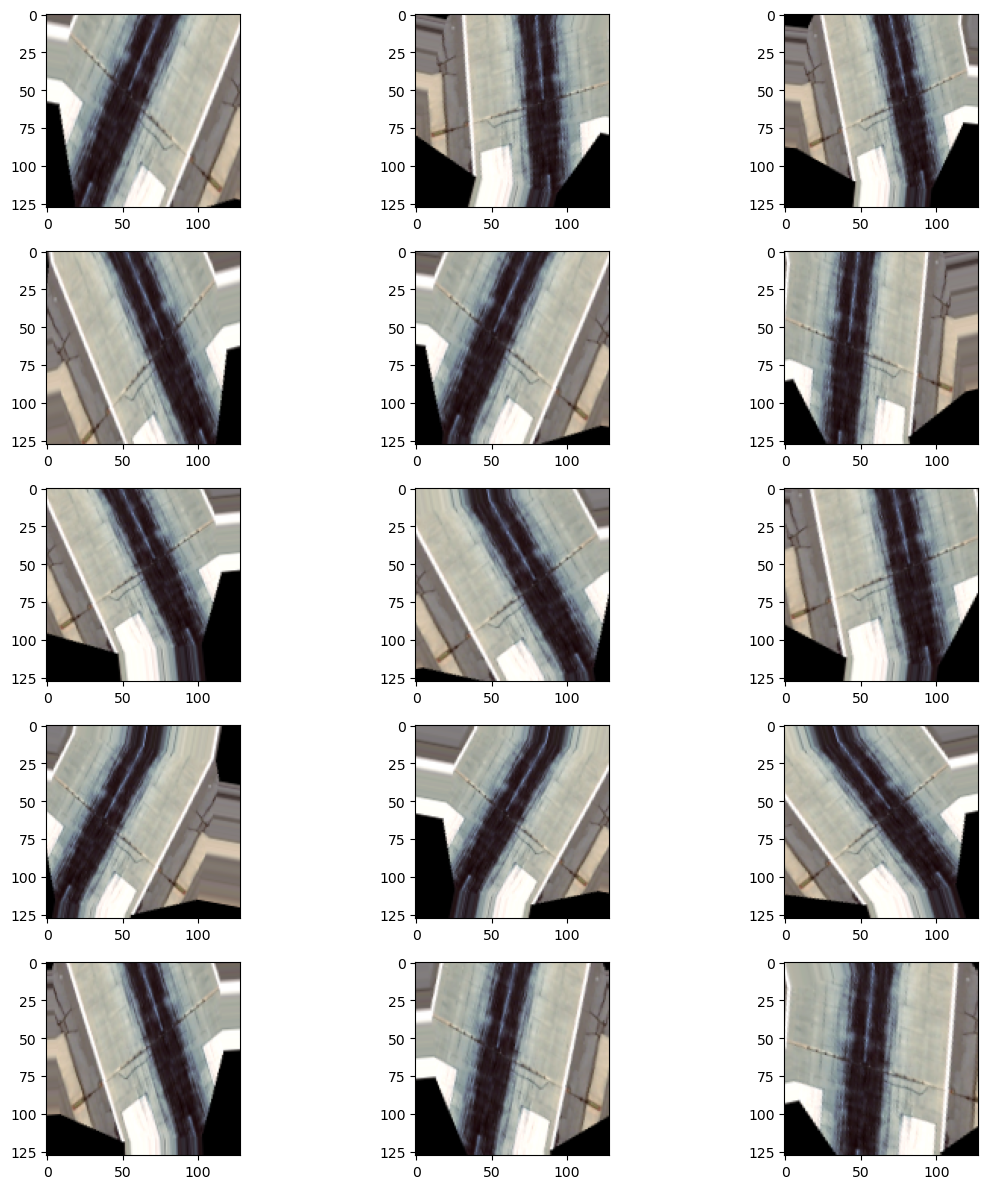

In [107]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/VaishnaviKanagaraj/Desktop/images_train_test_val/training_v/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [108]:
# epochs=3 if FAST_RUN else 5
epochs= 2
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/2


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 21), output.shape=(None, 1)

In [ ]:
model.save_weights("fruits.weights.h5")

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

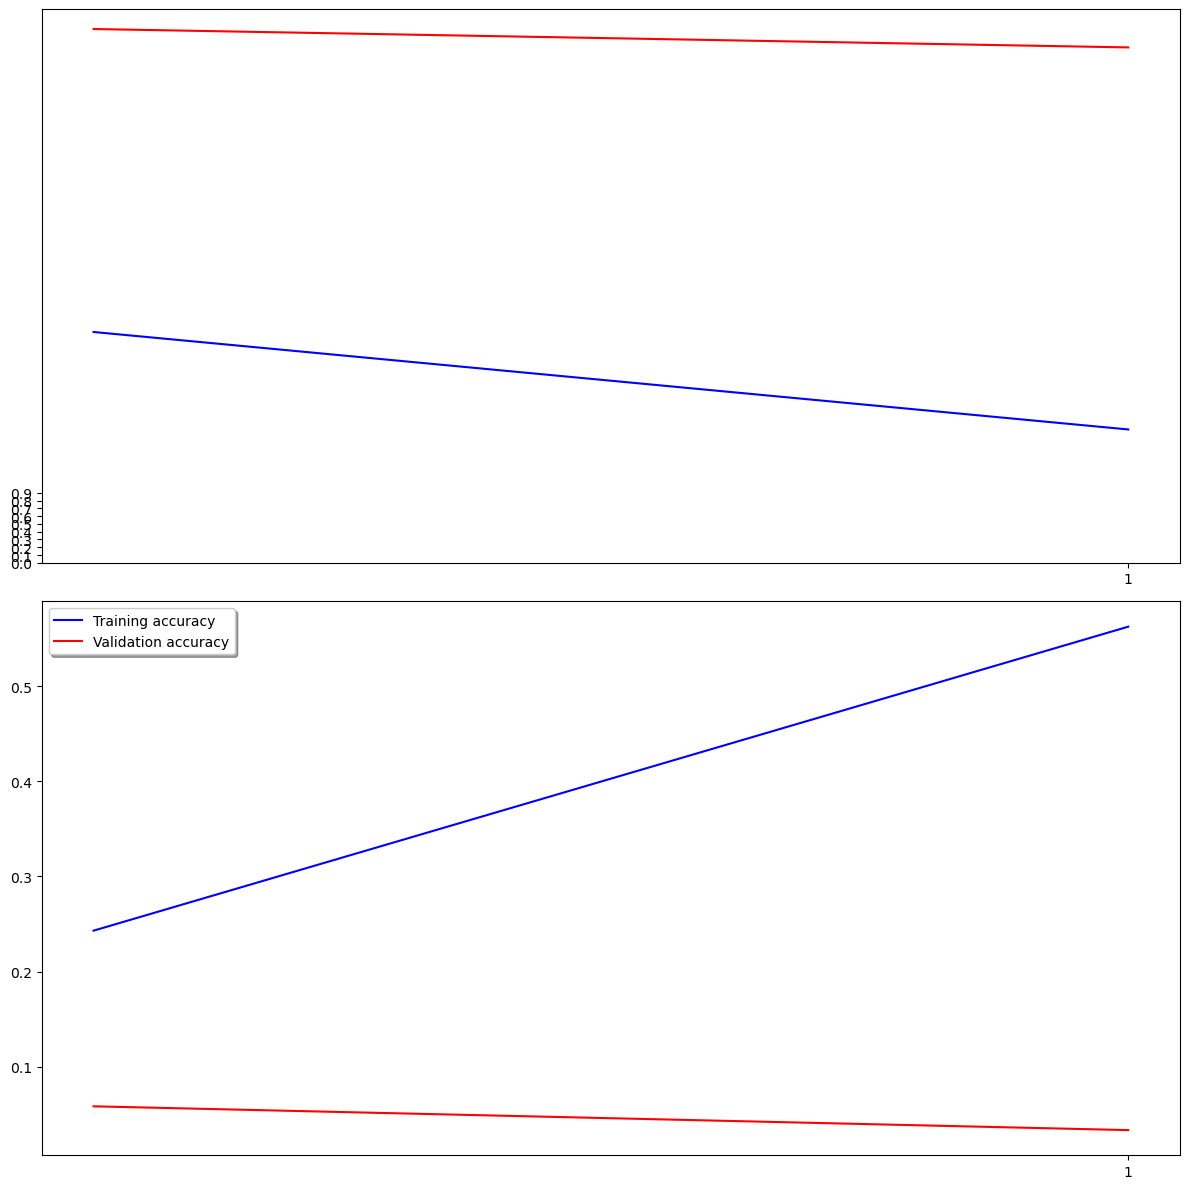

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("C:/Users/VaishnaviKanagaraj/Downloads/test/train/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


In [ ]:
# test_df.head()
nb_samples
print(nb_samples)

1050


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/Users/VaishnaviKanagaraj/Downloads/test/train/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1050 validated image filenames.


In [ ]:
predict = model.predict(test_generator)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'].value_counts()

category
agricultural    1050
Name: count, dtype: int64

<Axes: xlabel='category'>

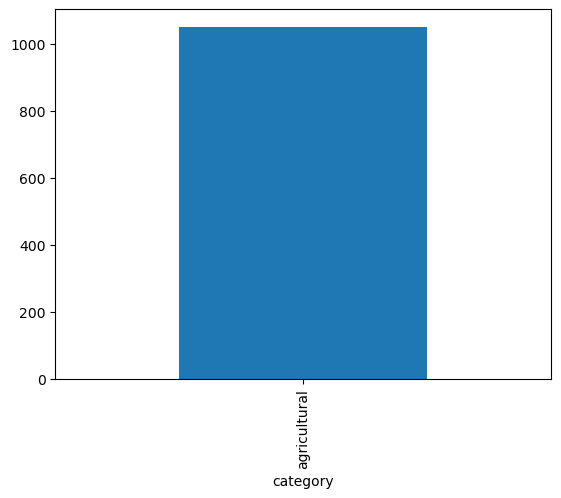

In [ ]:
test_df['category'].value_counts().plot.bar()   

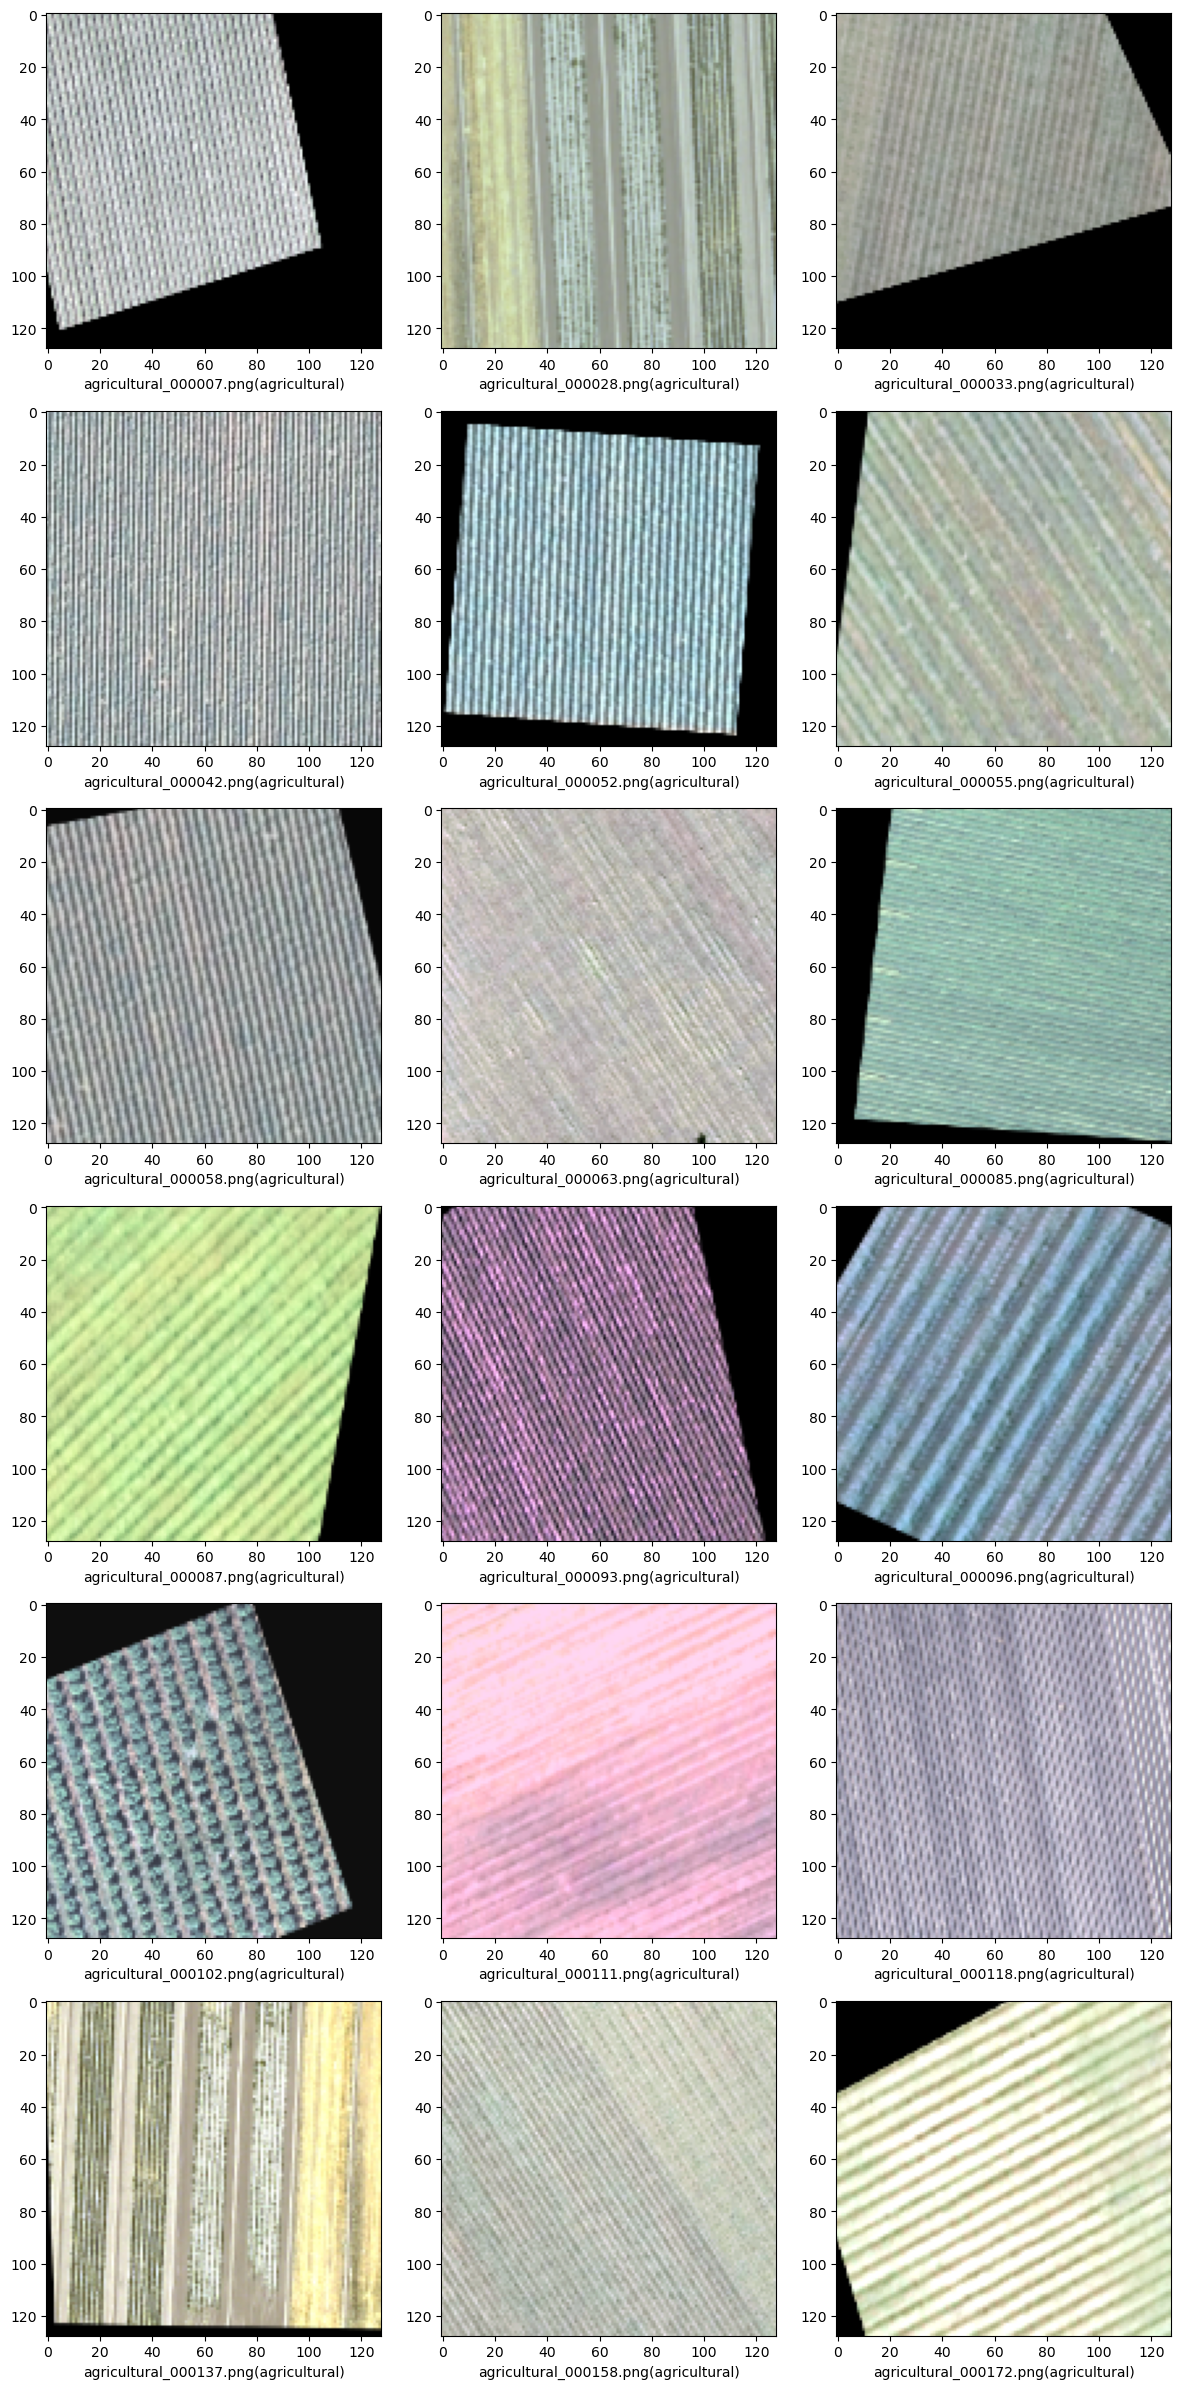

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/VaishnaviKanagaraj/Downloads/test/train/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('hackathon.csv', index=False)

In [ ]:
# %pip install seaborn

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

In [ ]:
from keras.preprocessing import image
def load_and_preprocess_image(img_path, target_size):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Rescale the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape (1, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
# Path to the single image you want to predict
img_path = 'freeway_000274.png'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path, target_size=IMAGE_SIZE)

# Make a prediction
prediction = model.predict(img_array)

# Convert prediction to class label
predicted_class = np.argmax(prediction, axis=1)

# # Assuming you have a dictionary to map class indices to class names
# class_indices = {0: 'class_name_0', 1: 'class_name_1', ..., 14: 'class_name_14'}  # Modify this as per your classes
# predicted_label = class_indices[predicted_class[0]]

# print(f'Predicted label: {predicted_label}')

FileNotFoundError: [Errno 2] No such file or directory: 'freeway_000274.png'

In [ ]:
predict_labels = (prediction > 0.5).astype(int)
print(predict_labels)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
print(predicted_class[0])
predicted_probability = prediction[0][predicted_class[0]]
print(predicted_probability)

0
0.64071494


In [ ]:
for index in range(len(category_names)):
    print(index, category_names[index], prediction[0][index])

0 agricultural 0.64071494
1 airplane 0.017180277
2 baseballdiamond 0.0005680922
3 beach 0.00014728356
4 buildings 0.0002812341
5 chaparral 0.0089529175
6 denseresidential 0.00039875158
7 forest 0.005751827
8 freeway 0.0038766046
9 golfcourse 0.001867598
10 harbor 0.026033767
11 intersection 0.00024067172
12 mediumresidential 0.00017321324
13 mobilehomepark 0.0010096027
14 overpass 0.002670557
15 parkinglot 0.0029604083
16 river 0.274267
17 runway 0.0047894837
18 sparseresidential 0.00035735455
19 storagetanks 0.005916369
20 tenniscourt 0.0018419739


In [ ]:
category_names[predicted_class[0]]

NameError: name 'predicted_class' is not defined